<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-9bf91bc92b75>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become Familiar with the Dataset

### Dataset on housing prices in Boston

The following describes the dataset variables:

* CRIM - per capita crime rate by town;
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.;
* INDUS - proportion of non-retail business acres per town;
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise);
* NOX - nitric oxides concentration (parts per 10 million);
* RM - average number of rooms per dwelling;
* AGE - proportion of owner-occupied units built prior to 1940;
* DIS - weighted distances to five Boston employment centres;
* RAD - index of accessibility to radial highways;
* TAX - full-value property-tax rate per \\$10,000;
* PTRATIO - pupil-teacher ratio by town;
* LSTAT - % lower status of the population;
* MEDV - Median value of owner-occupied homes in \\$1000’s.

## Task 2: Generate Descriptive Statistics and Visualizations

### Boston DataFrame Info

<code>DataFrame.info()</code> method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


#### Conclusion

* This dataset contains 506 observations and 14 columns, all of which are complete (no missing values);  
* The columns represent various numerical features, 13 floats and 1 integer;
* The column 'Unnamed: 0' seems to be an index column.

### Boston DataFrame Descriptive Statistics

<code>DataFrame.describe()</code> method generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, by default, excluding <code>NaN</code> (Not-a-Number) values.  

In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Conclusion

* Size: 506 observations × 14 features;
* This shows the statistical summary of all numeric-typed columns: the count, the mean value, the standard deviation, the minimum and the maximum values, 25<sup>th</sup> percentile, 50<sup>th</sup> percentile, and 75<sup>th</sup> percentile;
* For example, per Capita Crime Rate by Town (<code>CRIM</code>): count = 506, mean = 3.614, standard deviation = 8.602, min = 0.006, max = 88.976, 25% = 0.082, 50% = 0.257, and 75% = 3.677, indicating a right-skewed distribution with some towns exhibiting significantly higher crime rates than others.

### Boxplot of the Median Value of Owner-Occupied Homes

<code>sns.boxplot()</code> function is used to display the distribution of numerical data and identify key stats like minimum and maximum values, median, identifying outliers, understanding how data is distributed and can compare the distribution of data across different categories or variables.

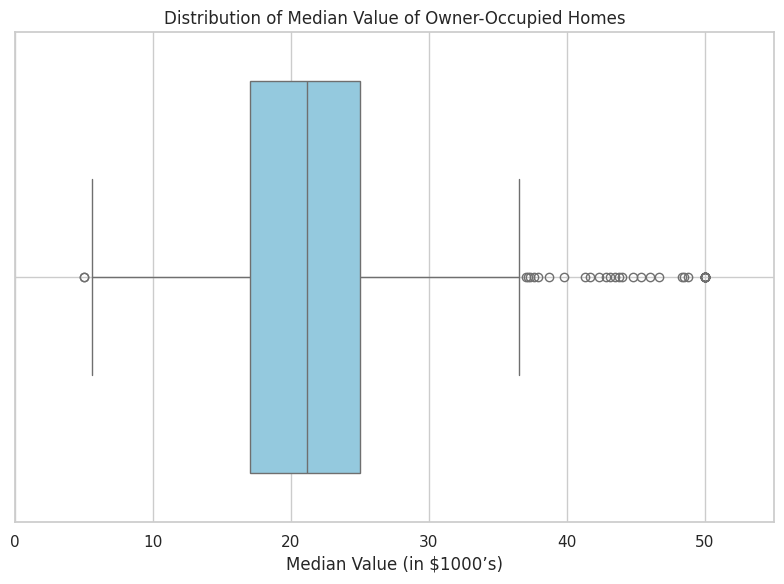

In [7]:
# setting the dimensions of the plot
plt.figure(figsize=(8, 6))

# Set the plot style
sns.set(style="whitegrid")

# Generate box plot
sns.boxplot(x=boston_df['MEDV'], color='skyblue')
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value (in $1000ʼs)')
plt.ylabel('')
plt.xlim(0, 55)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusion

This boxplot visualizes the distribution of the Median Value of Owner-Occupied Homes (<code>MEDV</code>) in $1000ʼs.

* This visualization helps identify skewness, spread, and outliers in homes values;
* Median: The middle line in the box represents the median value of homes, which appears to be around \\$21,200;
* Interquartile Range (IQR): 50% of the homes are priced between \\$17,025 and \\$25,000;  
* Whiskers: Extend to the minimum and maximum values within range \\$5,062.5 to \\$36,962.5;  
* Outliers: Any data point below \\$5,062.5 or above \\$36,962.5 is considered an outlier;
* Data points to the right of the whiskers represent high-valued homes that are significantly above the typical range;
* The distribution seems slightly right-skewed, with a number of homes reaching the upper cap of \\$50,000.

### Bar Plot of the Charles River Variable

<code>sns.countplot()</code> function is used to display the counts of observations in categorical data. It shows the distribution of a single categorical variable or the relationship between two categorical variables by creating a bar plot.

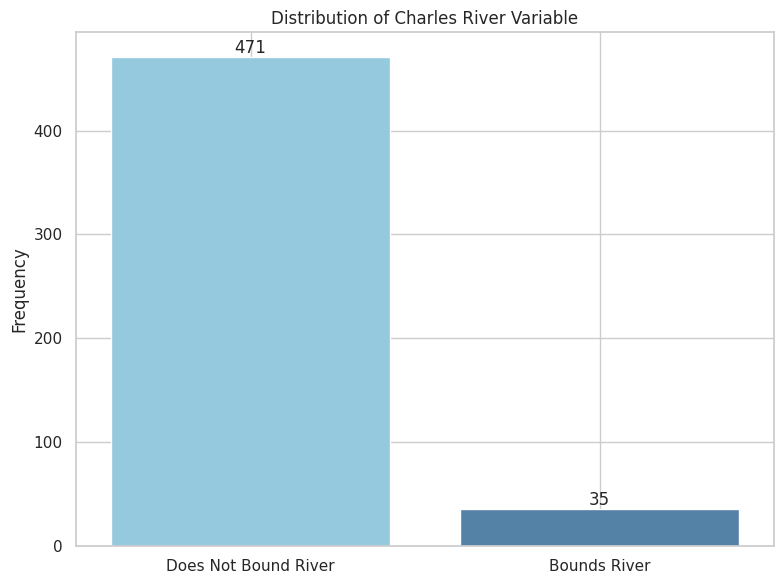

In [8]:
# Setting the dimensions of the plot
plt.figure(figsize=(8, 6))

# Set the plot style
sns.set(style="whitegrid")

# Generate countplot
colors = ['skyblue', 'steelblue']
ax = sns.countplot(x=boston_df['CHAS'], hue=boston_df['CHAS'], palette=colors, legend=False)
for label in ax.containers:
    ax.bar_label(label)
plt.title('Distribution of Charles River Variable')
#plt.xlabel('CHAS (1 = bounds river, 0 = does not bound river)')
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Does Not Bound River', 'Bounds River'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusion

This bar plot visualizes the distribution of the Charles River Variable (<code>CHAS</code>).

* This visualization shows that the vast majority of tracts in the dataset (471 out of 506) do not border the Charles River;
* Only a small number (35) of tracts border the Charles River;
* Homes near the Charles River are relatively rare;
* Proximity to the Charles River could be a potentially influential factor in housing prices.

### Boxplot of the Median Value of Owner-Occupied Homes by Age Groups

Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older.

In [9]:
# Discretize AGE into three groups
bins = [0, 35, 70, 100]
labels = ['<=35', '35-70', '>=70']
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

In [10]:
# Generate descriptive statistics
age_df = boston_df[['MEDV', 'AGE', 'age_group']]
age_df.groupby(by='age_group', observed=True)[['MEDV']].describe()

MEDV                                                        
           count       mean       std   min     25%    50%     75%   max
age_group                                                               
<=35        91.0  27.775824  7.638198  17.1  23.050  24.80  31.150  50.0
35-70      128.0  24.947656  6.969370  10.2  20.675  22.60  27.425  50.0
>=70       244.0  20.299590  9.346968   6.3  14.275  18.75  22.700  50.0

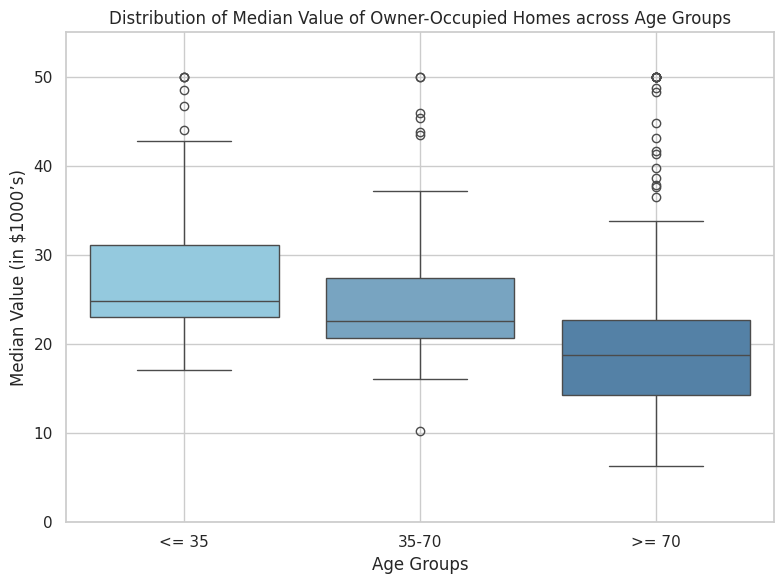

In [11]:
# Setting the dimensions of the plot
plt.figure(figsize=(8, 6))

# Set the plot style
sns.set(style="whitegrid")

# Define color palette
colors = ['#87CEEB',  # skyblue
          '#6CA6CD',  # medium skyblue
          '#4682B4']  # steelblue

# Generate box plot
sns.boxplot(y=age_df['MEDV'], x=age_df['age_group'], hue=age_df['age_group'], palette=colors, legend=False)
plt.title('Distribution of Median Value of Owner-Occupied Homes across Age Groups')
plt.ylabel('Median Value (in $1000ʼs)')
plt.xlabel('Age Groups')
plt.ylim(0, 55)
plt.xticks(['<=35', '35-70', '>=70'], ['<= 35', '35-70', '>= 70'], rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusion

This boxplot visualizes the distribution of the Median Value of Owner-Occupied Homes (<code>MEDV</code>) across three Age Groups (<code>AGE</code>).

* This visualization highlights that newer homes are generally valued higher and more consistently than older homes;
* Central Tendency across three Age Groups:  
  Newest homes (≤ 35 yrs): Median value = \\$24.800  
  Middle-aged homes (35–70 yrs): Median value = \\$22.600  
  Oldest homes (≥ 70 yrs): Median value = \\$18.750  
* As home age increases, median prices drop;
* Price variability is highest among the oldest homes;
* Newest homes (≤ 35 yrs) command higher and more consistent prices;  
* Middle-aged homes (35–70 yrs) show moderate prices and the tightest middle‐50% spread;  
* Oldest homes (≥ 70 yrs) have lower median values, greater dispersion, reflecting a mix of both lower-end and higher-priced properties.


### Scatter Plot showing the relationship between Nitric Oxide Concentrations and Proportion of Non-retail Business Acres per Town

<code>sns.scatterplot()</code> function is used to generate a scatter plot. A scatter plot displays the strength, direction, and form of the relationship between quantitative variables.

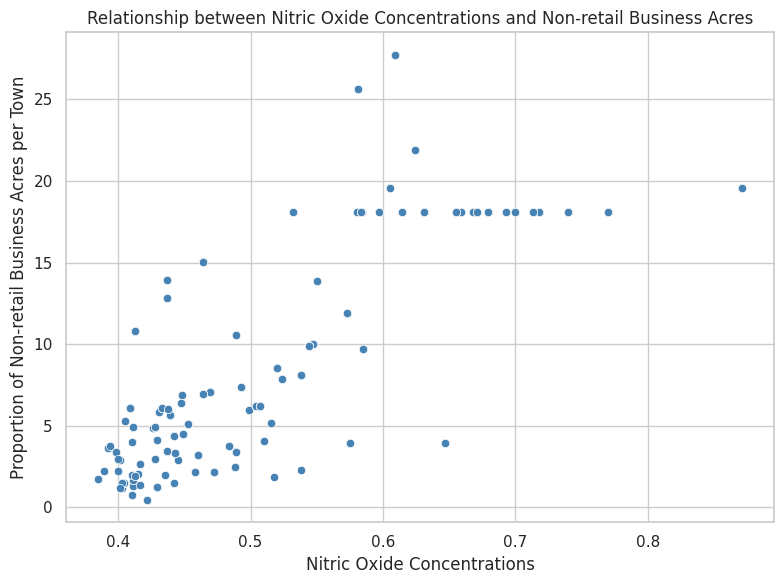

In [12]:
# Setting the dimensions of the plot
plt.figure(figsize=(8, 6))

# Set the plot style
sns.set(style="whitegrid")

# Generate scatter plot
sns.scatterplot(data=boston_df, x='NOX', y='INDUS', color='steelblue')
plt.title('Relationship between Nitric Oxide Concentrations and Non-retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-retail Business Acres per Town')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusion

This scatter plot shows the relationship between Nitric Oxide Concentration (<code>NOX</code>) and Proportion of Non-retail Business Acres per Town (<code>INDUS</code>).

* This visualization shows a strong positive correlation between Nitric Oxide Concentration and Proportion of Non-retail Business Acres per Town;
* As the Proportion of Non-retail Business Acres per Town increases, the Nitric Oxide Concentration also tends to increase as well.

### Histogram of the Pupil to Teacher Ratio

<code>sns.histplot()</code> function is used to generate a histogram. A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

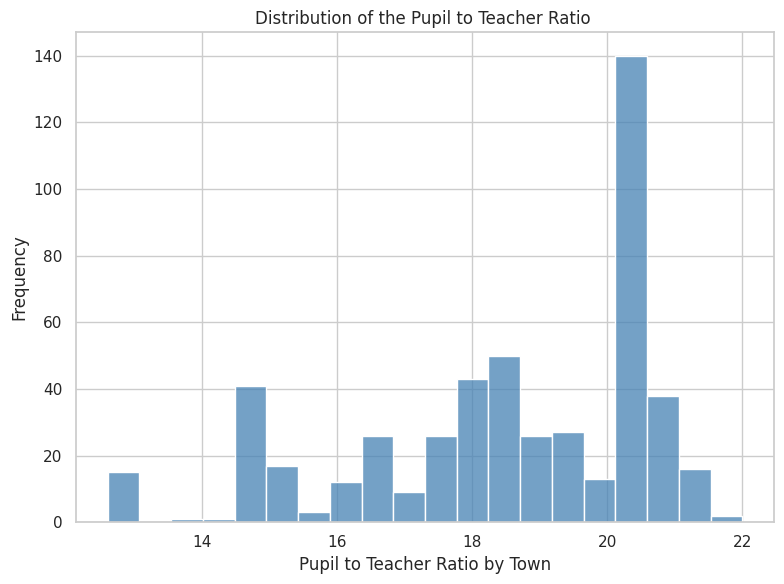

In [13]:
# Setting the dimensions of the plot
plt.figure(figsize=(8, 6))

# Set the plot style
sns.set(style="whitegrid")

# Generate histogram
ax = sns.histplot(boston_df['PTRATIO'], color='steelblue', bins=20)
#for label in ax.containers:
#    ax.bar_label(label)
plt.title('Distribution of the Pupil to Teacher Ratio ')
plt.xlabel('Pupil to Teacher Ratio by Town')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Conclusion

This histogram visualizes the distribution of the Pupil to Teacher Ratio by Town (<code>PTRATIO</code>).

* The histogram reveals a slightly left-skewed distribution, most values are concentrated toward the higher end of the range;
* The overall range of values extends from about 12.6 to 22.0;
* The most frequent values lie between 17.4 and 20.2;
* Many towns have a Pupil to Teacher Ratio in moderate range;
* A few towns have particularly low ratios (below 14) or high ratios (above 21).

## Task 3: Use the appropriate tests to answer the questions provided

**Be sure to:**
* State your hypothesis;
* Use α = 0.05;
* Perform the test statistics;
* State the conclusion from the test.

### Q1: Is there a significant difference in the Median Value of Houses bounded by the Charles River or not?

**State the hypothesis:**

* $H\_0: µ\_1 = µ\_2$ ("there is no difference")
* $H\_1: µ\_1 ≠ µ\_2$ ("there is a significant difference")

In [14]:
# Generate descriptive statistics
boston_df.groupby(by='CHAS')[['MEDV']].describe()

MEDV                                                     
      count       mean        std   min   25%   50%    75%   max
CHAS                                                            
0.0   471.0  22.093843   8.831362   5.0  16.6  20.9  24.80  50.0
1.0    35.0  28.440000  11.816643  13.4  21.1  23.3  33.15  50.0

<code>levene()</code> this is a test for the null hypothesis that all input samples are from populations with equal variances.

In [15]:
statistic, p_value = scipy.stats.levene(
    boston_df[boston_df['CHAS']==0]['MEDV'],
    boston_df[boston_df['CHAS']==1]['MEDV'], center='mean'
)
print("statistic: {0}, p-value: {1}".format(statistic, p_value))

statistic: 8.75190489604598, p-value: 0.003238119367639829


Since the p-value is lower than 0.05, we reject the assumption of equal variances.  

<code>ttest_ind()</code> function performes the t-test for the null hypothesis that two independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [16]:
t_statistic, p_value = scipy.stats.ttest_ind(
    boston_df[boston_df['CHAS']==0]['MEDV'], 
    boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False
)
print("t-statistic: {0}, p-value: {1}".format(t_statistic, p_value))

t-statistic: -3.113291312794837, p-value: 0.003567170098137517


#### Conclusion

Interpretation of the t-test result assessing whether there is a significant difference in the Median Value of Homes (<code>MEDV</code>) based on whether they are bounded by the Charles River (<code>CHAS</code>).

* p-value = 0.00357  
 This value is less than 0.05, we reject the null hypothesis as there is enough proof that there is a statistically significant difference in the Median Value of Houses depending on whether they are bounded by the Charles River;
* t-statistic = -3.113  
 This negative value indicates that homes located next to the Charles River (<code>CHAS = 1</code>) have significantly higher Median Values compared to those that are not (<code>CHAS=0</code>).

### Q2: Is there a difference in Median Values of Houses of each Proportion of Owner-occupied Units built before 1940?

**State the hypothesis:**

* $H\_0: µ\_1 = µ\_2 = µ\_3$ ("there is no difference")
* $H\_1:$ At least one of the means differ

The data is already grouped into three Age categories.

In [17]:
# Generate descriptive statistics
age_df.groupby(by='age_group', observed=True)[['MEDV']].describe()

MEDV                                                        
           count       mean       std   min     25%    50%     75%   max
age_group                                                               
<=35        91.0  27.775824  7.638198  17.1  23.050  24.80  31.150  50.0
35-70      128.0  24.947656  6.969370  10.2  20.675  22.60  27.425  50.0
>=70       244.0  20.299590  9.346968   6.3  14.275  18.75  22.700  50.0

In [18]:
statistic, p_value = scipy.stats.levene(
    boston_df[boston_df['age_group']=='<=35']['MEDV'],
    boston_df[boston_df['age_group']=='35-70']['MEDV'],
    boston_df[boston_df['age_group']=='>=70']['MEDV'],
    center='mean'
)
print("statistic: {0}, p-value: {1}".format(statistic, p_value))

statistic: 2.153482106842707, p-value: 0.11724809640667667


Since the p-value is greater than 0.05, we fail to reject the assumption of equal variances.

<code>f_oneway()</code> function performes the one-way ANOVA test for the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [19]:
f_statistic, p_value = scipy.stats.f_oneway(
    boston_df[boston_df['age_group']=='<=35']['MEDV'],
    boston_df[boston_df['age_group']=='35-70']['MEDV'],
    boston_df[boston_df['age_group']=='>=70']['MEDV']
)
print("F-statistic: {0}, p-value: {1}".format(f_statistic, p_value))

F-statistic: 30.566839914861454, p-value: 3.435569235360708e-13


#### Conclusion

Interpretation of the ANOVA test result assessing differences in the Median Value of Homes (<code>MEDV</code>) across three Age groups (<code>age_group</code>).
* p-value = 3.436e-13  
 This value is extremely small, far below than 0.05, we reject the null hypothesis as there is a very strong evidence that at least one of the means differ;
* F-statistic = 30.567  
 This high value indicates that there is a statistically significant difference in the Median Value of Homes across three Age groups.

### Q3: Can we conclude that there is no relationship between Nitric Oxide Concentrations and the Proportion of Non-retail Business Acres per Town? 

**State the hypothesis:**

* $H\_0:$ not correlated, Nitric Oxide Concentration and Proportion of Non-retail Business Acres per Town
* $H\_1:$ correlated, Nitric Oxide Concentration and Proportion of Non-retail Business Acres per Town

<code>pearsonr()</code> function performes the Pearson correlation test of the null hypothesis that the distributions underlying the samples are uncorrelated.

The Pearson correlation coefficient measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [20]:
ccoef, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Correlation coefficient (r): {0}, p-value: {1}".format(ccoef, p_value))

Correlation coefficient (r): 0.7636514469209192, p-value: 7.913361061210442e-98


#### Conclusion

Interpretation of the the Pearson test results examining the relationship between Nitric Oxide Concentrations (<code>NOX</code>) and Proportion of Non-retail Business Acres per Town (<code>INDUS</code>).
* p-value = 7.913e-98  
  This value is extremely small, far below than 0.05, we reject the null hypothesis as it strongly indicates the correlation between Nitric Oxide Concentrations and Proportion of Non-retail Business Acres per Town;
* Correlation coefficient (r) = 0.764  
  This value is close to +1, indicating a significant and strong positive correlation. As the Proportion of Non-retail Business Acres per Town increases, the Nitric Oxide Concentration also tends to increase.

### Q4: What is the impact of an additional Weighted Distance to the five Boston Employment Centres on the Median Value of Owner-occupied Homes?

**State the hypothesis:**

* $H\_0:$ there is no impact of an Additional Weighted Distance to the five Boston Employment Centres on the Median Value of Owner-occupied Homes
* $H\_1:$ there is impact of an Additional Weighted Distance to the five Boston Employment Centres on the Median Value of Owner-occupied Homes

Create a scatter plot to visualize the relationship between Additional Weighted Distance to the five Boston Employment Centres (<code>DIS</code>) and the Median Value of Owner-occupied Homes (<code>MEDV</code>).

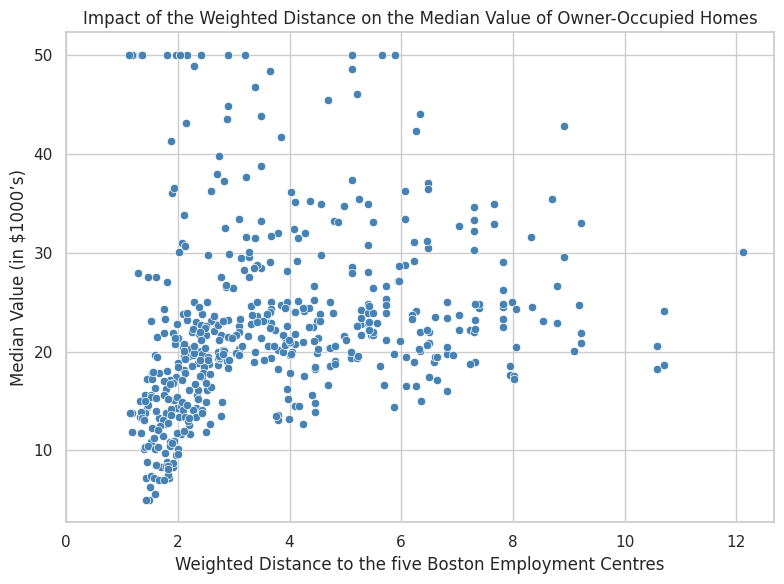

In [21]:
# Setting the dimensions of the plot
plt.figure(figsize=(8, 6))

# Set the plot style
sns.set(style="whitegrid")

# Generate scatter plot
sns.scatterplot(data=boston_df, x='DIS', y='MEDV', color='steelblue')
plt.title('Impact of the Weighted Distance on the Median Value of Owner-Occupied Homes')
plt.xlabel('Weighted Distance to the five Boston Employment Centres')
plt.ylabel('Median Value (in $1000ʼs)')
plt.xlim(0,)
plt.grid(True)
plt.tight_layout()
plt.show()

<code>OLS()</code>, Ordinary Least Squares, is a widely used statistical method for estimating the parameters of a linear regression model. A linear regression model establishes the relationship between a dependent variable and one or more independent variables.

In [22]:
# X is the independent variable
X = boston_df['DIS']
# y is the target variable
y = boston_df['MEDV']
# Add an intercept (beta_0) to the model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.21e-08
Time:                        15:27:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

Interpretation of the OLS regression results examining the relationship between the Weighted Distance to Employment Centres (<code>DIS</code>) and the Median Value of Owner-occupied Homes (<code>MEDV</code>).

* p-value = 0.000  
  This value is far below 0.05, we reject the null hypothesis, as it indicates statistically significant relationship between the Weighted Distance to Employment Centres and the Median Value of Owner-occupied Homes;
* F-statistic = 33.58  
  This value is much larger than 1, suggesting that the Regression model explains significantly more variance than a model with no predictors;
* R-squared = 0.062  
  This value indicates that only about 6.2% of the variance in the Median Value is explained by the Weighted Distance;
* Coefficient (DIS) = 1.0916  
  This value indicates a positive relationship between the Weighted Distance to Employment Centres and the Median Value of Owner-occupied Homes. For every 1 unit increase in the Weighted Distance, the Median Value (in \\$1000ʼs) increases by approximately \\$1,091.60;
* The Regression model is statistically significant, but not very strong. There's a lot of variation in the Median Value that the Weighted Distance doesn't explain.